In [93]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
nltk.download("stopwords")
dataset = pd.read_csv("SMSSpamCollection.txt", sep="\t", names=["label","texts"])
dataset['label'] = dataset['label'].replace({'ham': 'Not Spam'})
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NASHEED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,texts
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
#printing all the spam messages in the dataset
spam_msg= dataset.loc[dataset['label'] == 'spam']
spam_msg.head()

,label,texts
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [44]:
#Word Frequency of spam words in the dataset.

wordfreq = {}
for sentence in spam_msg["texts"]:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1
            
print(wordfreq)  

{'Free': 42, 'entry': 25, 'in': 68, '2': 176, 'a': 360, 'wkly': 10, 'comp': 10, 'to': 611, 'win': 28, 'FA': 4, 'Cup': 3, 'final': 11, 'tkts': 4, '21st': 2, 'May': 2, '2005': 3, '.': 1019, 'Text': 40, '87121': 4, 'receive': 30, 'question': 6, '(': 54, 'std': 9, 'txt': 71, 'rate': 19, ')': 66, 'T': 66, '&': 178, 'C': 46, "'s": 68, 'apply': 27, '08452810075over18': 2, 'FreeMsg': 11, 'Hey': 5, 'there': 10, 'darling': 2, 'it': 27, 'been': 43, '3': 26, 'week': 52, 'now': 138, 'and': 119, 'no': 19, 'word': 25, 'back': 21, '!': 545, 'I': 42, "'d": 2, 'like': 13, 'some': 6, 'fun': 9, 'you': 189, 'up': 19, 'for': 170, 'still': 7, '?': 175, 'Tb': 1, 'ok': 3, 'XxX': 2, 'chgs': 1, 'send': 47, ',': 378, '£1.50': 18, 'rcv': 2, 'WINNER': 3, 'As': 12, 'valued': 11, 'network': 22, 'customer': 39, 'have': 129, 'selected': 25, 'receivea': 2, '£900': 7, 'prize': 73, 'reward': 8, 'To': 74, 'claim': 78, 'call': 187, '09061701461': 2, 'Claim': 32, 'code': 12, 'KL341': 2, 'Valid': 20, '12': 4, 'hours': 5, 'onl

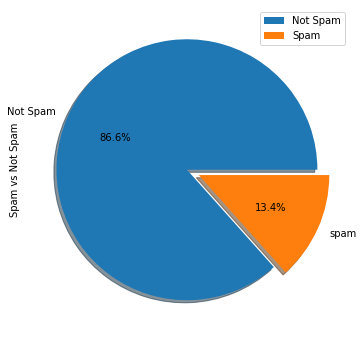

In [35]:
#Pie chart showing the composition of spam and not spam messages
dataset["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Not Spam")
plt.legend(["Not Spam", "Spam"])
plt.show()

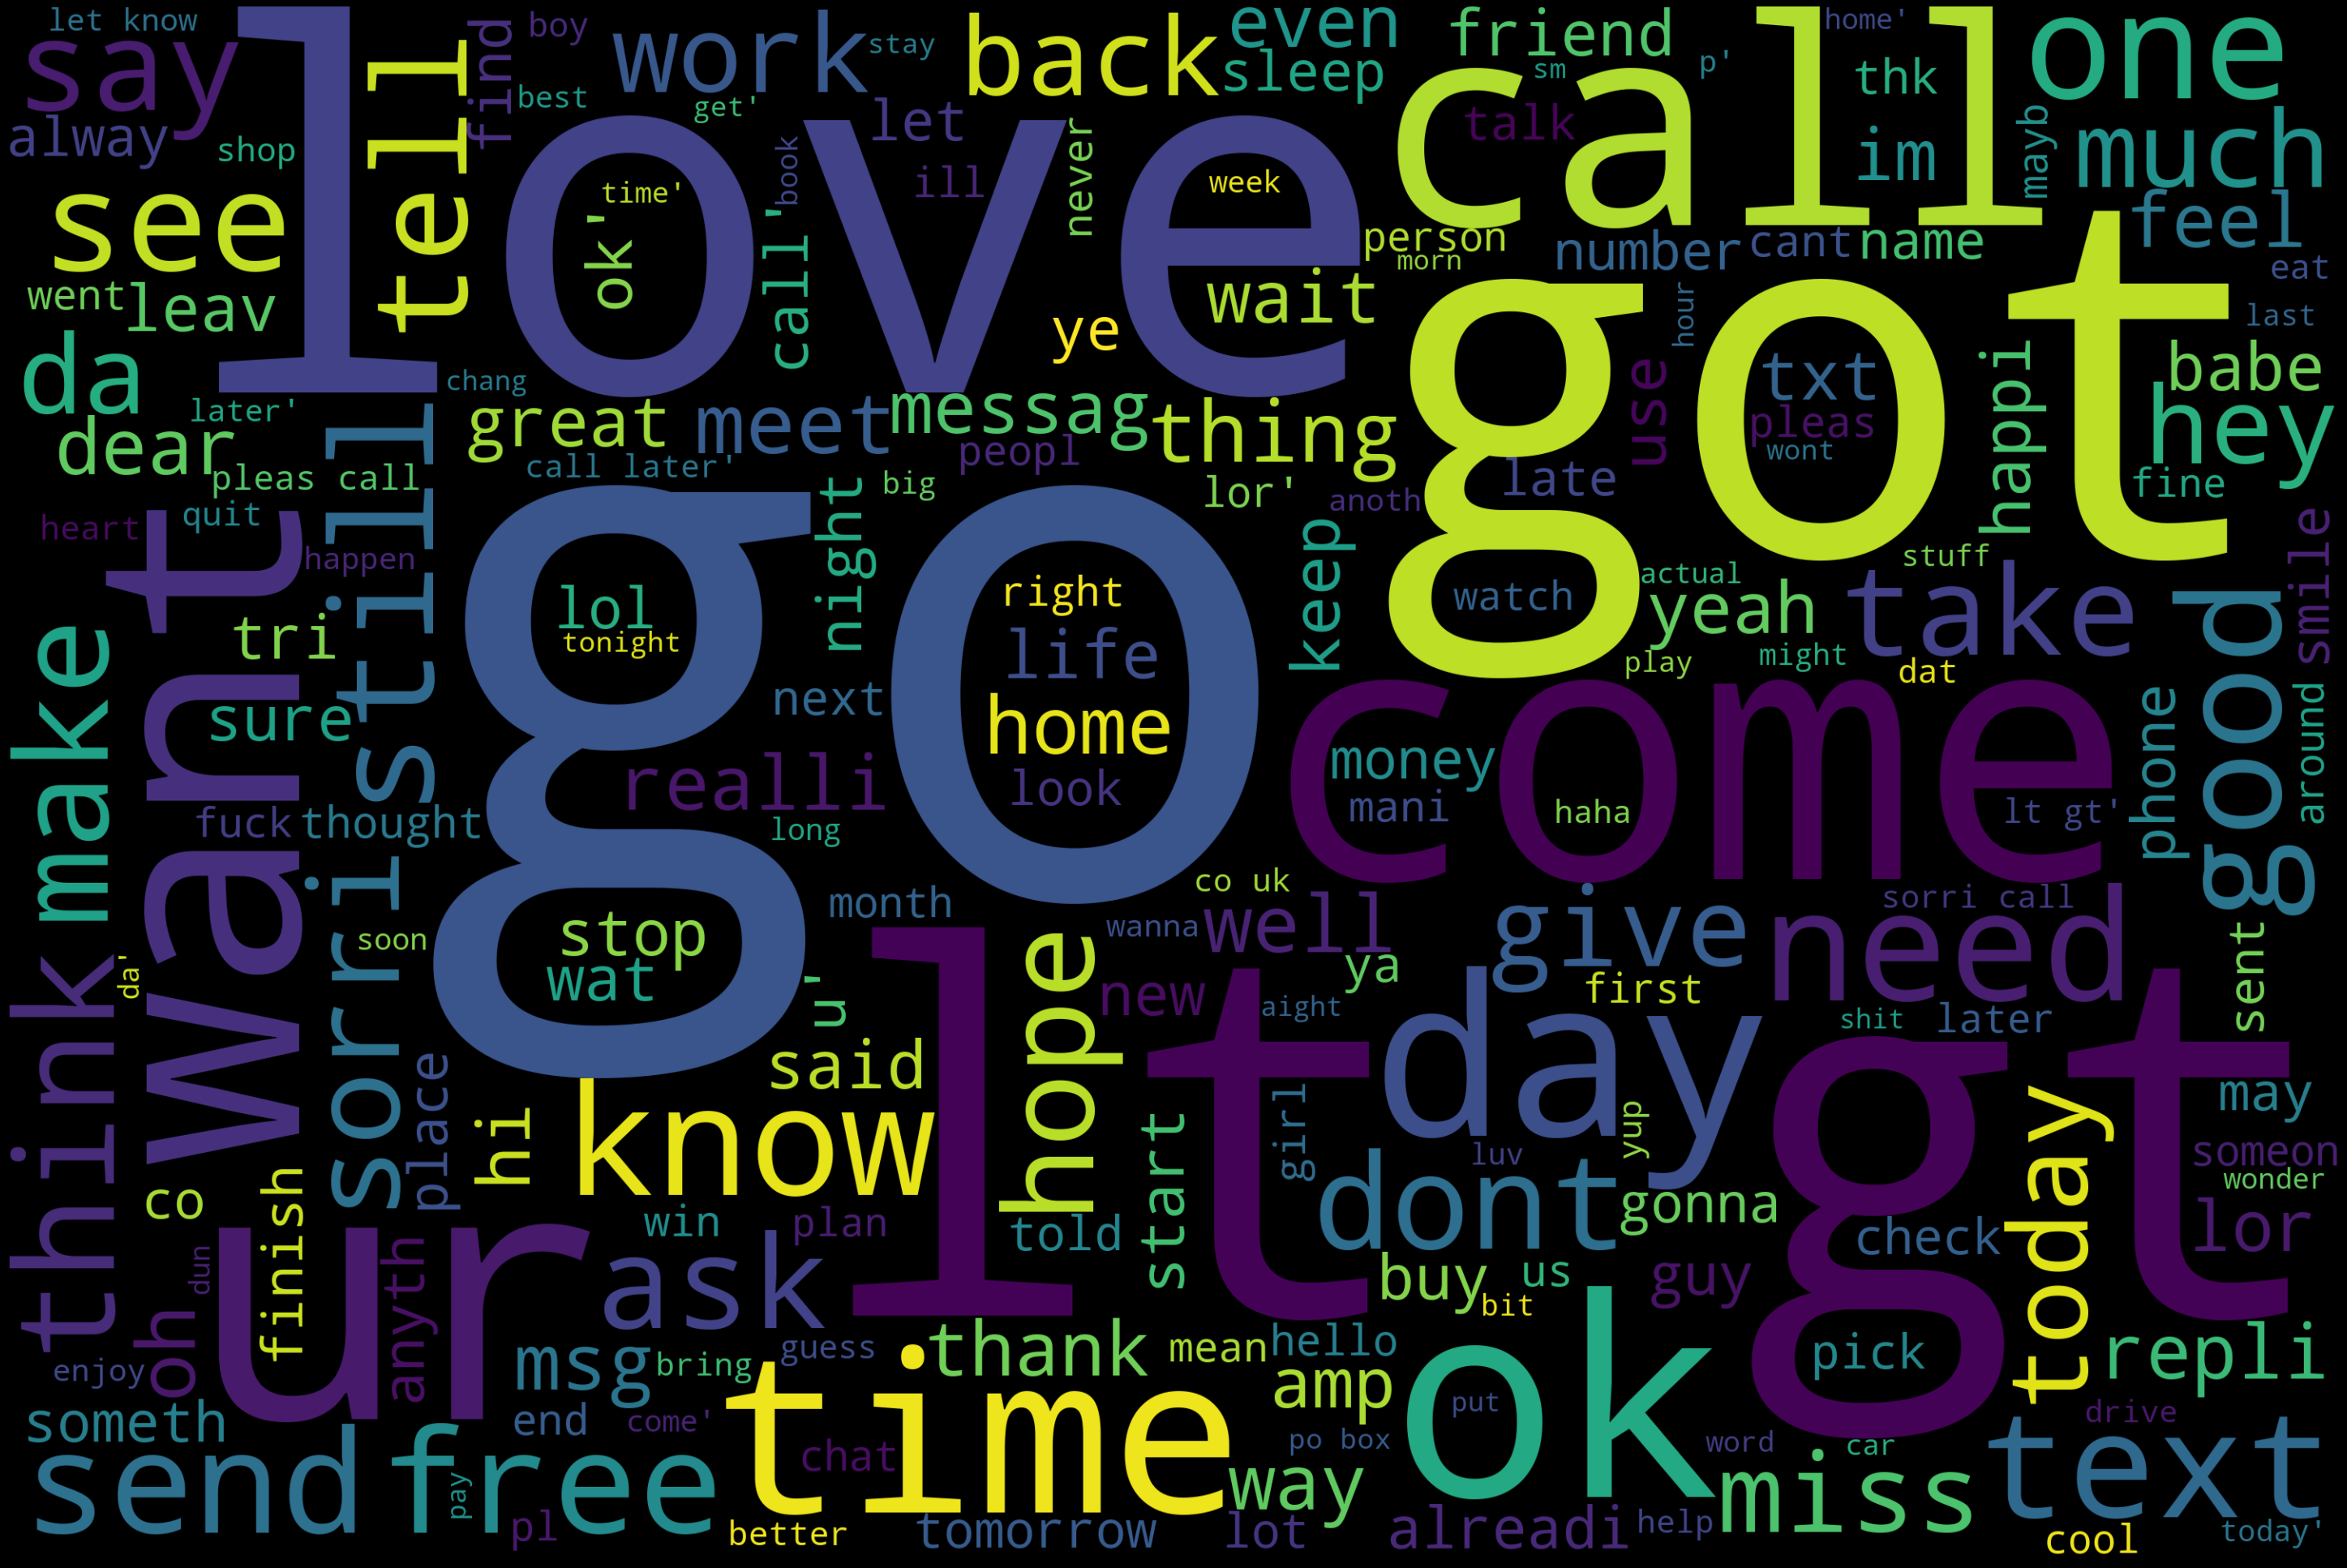

In [8]:
#Generating a wordcloud of the most frequent words in the dataset.

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = corpus
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [60]:
#Data Preprocessing
for i in range(0,len(dataset)):
    newdataset = re.sub('[^a-zA-Z]', ' ' ,dataset['texts'][i])
    newdataset = newdataset.lower()
    newdataset = newdataset.split()
    
    newdataset = [porter_stemmer.stem(word) for word in newdataset if not word in stopwords.words('english')] 
    newdataset =' '.join(newdataset)
    corpus.append(newdataset)
    

In [65]:
#Creating an instance of the tf-idf vectorizer
vectorizer = TfidfVectorizer()

In [66]:
#Converting the words in the corpus to vectors 
X=vectorizer.fit_transform(corpus)


In [16]:
y=pd.get_dummies(dataset["label"])
y=y.iloc[:,1].values

In [17]:
#Spltting the test and train data
X_train, X_test ,y_train , y_test = train_test_split(X,y,test_size =0.20 ,random_state=0)

In [18]:
spam_detection_model = MultinomialNB().fit(X_train , y_train)

In [19]:
y_pred = spam_detection_model.predict(X_test)

In [35]:
c_matrix = confusion_matrix(y_test,y_pred)

In [36]:
#Printing the confusion matrix
c_matrix

array([[955,   0],
       [ 34, 126]], dtype=int64)

In [51]:
#Printing the metrics that will help us evaluate the performance of the predictive model

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       955
           1       1.00      0.79      0.88       160

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [134]:
#Testing our spam model on unseen data taken from the internet.

classes={0:"Not Spam", 1:"Spam"}

def pred(msg):    
    msg = vectorizer.transform([msg])    
    prediction = spam_detection_model.predict(msg)
  
    return prediction[0]

In [135]:
pred("URGENT! We are trying to contact U.Todays draw shows that you have won a 2000 prize GUARANTEED. Call 090 5809 4507 from a landline. Claim 3030. Valid 12hrs only.")


1

In [137]:
pred('Alert!!:Your Mobile No is Selected as winner of $1750000 on Coke Promo. Go to jangifts.net to claim.enter Ref:AU66725372.helpline:info@mobilecola.co.uk')

1

In [141]:
pred('Your entry in our drawing WON you a free $1000 Best Buy GiftCard!Enter "614" at www.bestbuy.com.tbff.biz so we can ship it to you immediately.')

0

In [143]:
pred('COngratulations!You have won a $500 Woolworths GIftcard as part of our Customer of the month program.Claim your FREE voucher now: http://bit.ly/2B9rFVW')

1

In [144]:
pred('Saadman is stupid')

0